<a href="https://colab.research.google.com/github/anyuanay/INFO213/blob/main/INFO213_Week4_logisticRegression_optimizer_regularization_lecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INFO 213: Data Science Programming 2
___

### Week 4: Logistic Regression and Regularization
___


**Agenda:**
- Logistic regression with Scikit Learn
- Linear and nonlinear decision boundaries
- Regularization

# Model and Decision Boundary

## Mode for single input:

<div style="display: flex; justify-content: space-around;">
  <img src="https://github.com/anyuanay/INFO213/blob/main/single_input_classification_model.png?raw=true" width="45%"/>
  <img src="https://github.com/anyuanay/INFO213/blob/main/single_input_classification_decision_boundary.png?raw=true" width="45%"/>
</div>

## Model for two inputs:

<div style="display: flex; justify-content: space-around;">
  <img src="https://github.com/anyuanay/INFO213/blob/main/two_inputs_classification_decision_boundary.png?raw=true" width="45%"/>
  <img src="https://github.com/anyuanay/INFO213/blob/main/two_inputs_classification_model.png?raw=true" width="45%"/>
</div>

# Training a logistic regression model with scikit-learn and selecting hyperparameters
- Let us learn how to use scikit-learn's more optimized implementation of logistic regression.
- We also need to know how to choose hyperparameters for logistic regression

## Load the Iris Dataset
- Loading the Iris dataset from scikit-learn. Here, the third column represents the petal length, and the fourth column the petal width of the flower examples.

- The classes are already converted to integer labels where `0=Iris-Setosa`, `1=Iris-Versicolor`, `2=Iris-Virginica`.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn import datasets

iris = datasets.load_iris()

In [ ]:
X_iris = iris.data[:, [2, 3]]
y_iris = iris.target

print('Class labels:', np.unique(y_iris))

Class labels: [0 1 2]


## Split data into 70% training and 30% test data

In [ ]:
from sklearn.model_selection import train_test_split

X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(
    X_iris, y_iris, test_size=0.3, random_state=1, stratify=y_iris)

In [ ]:
print('Labels count in y:', np.bincount(y_iris))
print('Labels count in y_train:', np.bincount(y_iris_train))
print('Labels count in y_test:', np.bincount(y_iris_test))

Labels count in y: [50 50 50]
Labels count in y_train: [35 35 35]
Labels count in y_test: [15 15 15]


## Standardize the features

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_iris_train)
X_iris_train_std = sc.transform(X_iris_train)
X_iris_test_std = sc.transform(X_iris_test)

## Import LogisticRegresssion from Scikit Learn

In [ ]:
from sklearn.linear_model import LogisticRegression

## Instantiate a LogisticRegressio Classifier with Hyperparameters

```
lr = LogisticRegression(C=100.0, penalty="l2", random_state=1, solver='lbfgs')
```

## Fit and Predict

```
lr.fit(X_iris_train_std, y_iris_train)
```

```
# predict the test data
y_iris_pred = lr.predict(X_iris_test_std)
```

```
from sklearn.metrics import accuracy_score

accuracy_score(y_iris_test, y_iris_pred)
```

## Import Confusion Matrix from Scikiet Learn

In [ ]:
# prompt: compute the comfusion matrix given true and predicted labels.

from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_iris_test, y_iris_pred)
print(cm)


[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


## What is a Confusion Matrix?
- A table used to evaluate the performance of a classification model.

- Shows how many predictions were correct vs. incorrect for each class.

- Most commonly used for binary classification, but extends to multiclass too.


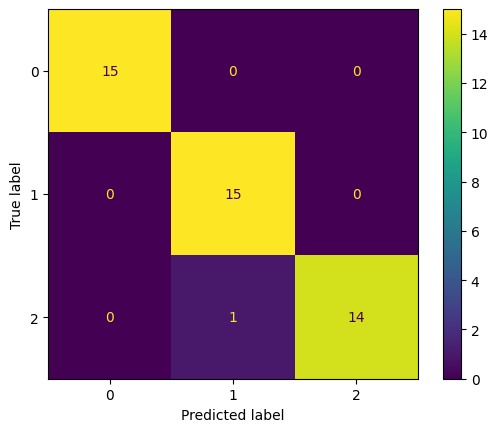

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

## Choose Optimizer
- There exist many different optimization algorithms for solving optimization problems. For minimizing convex loss functions, such as the logistic regression loss, it is recommended to use more advanced approaches than regular stochastic gradient descent (SGD).
- Scikit-learn implements a whole range of such optimization algorithms, which can be specified via the solver parameter, namely, `newton-cg`, `lbfgs`, `liblinear`,  `sag`, and `saga`.
- By default, it it `lbfgs`.

## Predict probabilities vs. predict labels
 - Use predict_proba() when you need probabilities.

- Use predict() when you just want the class label.

- Uses a threshold of 0.5 by default (for binary classification):

 - If P(class 1) >= 0.5, predicts class 1

 - Otherwise, predicts class 0

```
lr.predict_proba(X_iris_test_std[:3, :])
```

In [ ]:
lr.predict_proba(X_iris_test_std[:3, :]).sum(axis=1)

array([1., 1., 1.])

In [ ]:
lr.predict_proba(X_iris_test_std[:3, :]).argmax(axis=1)

array([2, 0, 0])

```
lr.predict(X_iris_test_std[:3, :])
```

# Retrieval Practice

## Tackling overfitting via regularization
- What is the mysterious parameter $C$ in `LogisticRegression(C=100.0, penalty="l2", random_state=1, solver='lbfgs')`?
- The parameter $C$ that is implemented for the `LogisticRegression` class in scikit-learn is the inverse of regularization parameter, $\lambda$.
- What is regularization?

## Let us Being with Nonlinearly Separable Data
- The following two sets of data are not separable by any linear line
<img src="https://i.imgur.com/HtvJMxf.png" width=800>
- However, adding a polynomial term in the linear combination will separate the data sets:
<img src="https://i.imgur.com/oMA9Sb8.png" width = 800>
- The question is how to control the right amount of nonlinear terms?

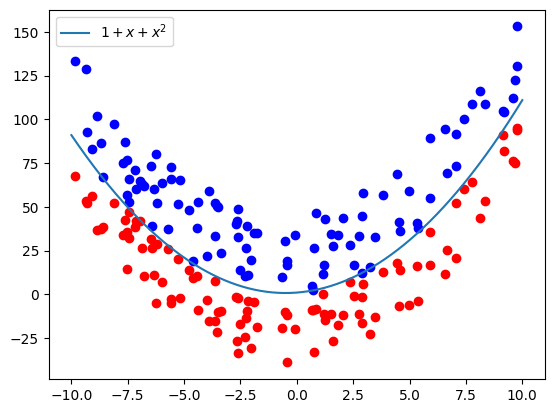

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Define the function
def f(x):
    return 1 + x + x**2

# Create the x values
x_ex = np.linspace(-10, 10, 1000)

# Create the y values
y_ex = f(x_ex)

# Create the x values
x1 = np.random.uniform(-10, 10, size=100)

y1 = f(x1)

y_below = y1 - np.random.uniform(0, 40, size=100)

# Create the points above the curve
y_above = y1 + np.random.uniform(0, 50, size=100)

# Plot the curve
plt.plot(x_ex, y_ex, label="$1+x+x^2$")

# Plot the points below the curve in red
plt.scatter(x1, y_below, color='red')

# Plot the points above the curve in blue
plt.scatter(x1, y_above, color='blue')

plt.legend()

# Show the plot
#plt.savefig("/content/drive/MyDrive/Colab Notebooks/courses/INFO213/lectures/Nonlinearly_separable_separated_by_curve.png")

plt.show()


## Convert Non-Linear Relationships to Linear Models
- One trick you can use to adapt linear relationships to nonlinear relationships between variables is to transform the data according to *polynomial functions*.

- The idea is to add polynomial terms to the linear function. For example, given a single-demensional linear function:
$$
y = w_0 + w_1 x$$
we can extend it to a multi-dimensional function:
$$
y = w_0 + w_1 x_1 + w_2 x_2 + w_3 x_3 + \cdots
$$
where $x_1=1$, $x_2=x^2$, $x_3=x^3$, and so on, from the single-dimensional input $x$.

- Notice that this is *still a linear model* — the linearity refers to the fact that the coefficients $w_n$ never multiply or divide each other.

- What we have effectively done is taken our one-dimensional $x$ values and projected them into a higher dimension, so that a linear fit can fit more complicated relationships between $x$ and $y$.

### Utility function for visualization

In [ ]:
def plot_with_decision_boundary(X, y, poly, clf, title):

    # Create meshgrid
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))


    # Transform meshgrid
    grid = np.c_[xx.ravel(), yy.ravel()]

    # Predict on meshgrid points
    if poly:
        grid_poly = poly.transform(grid)
        Z = clf.predict(grid_poly)
    else:
        Z = clf.predict(grid)

    Z = Z.reshape(xx.shape)

    # Plot
    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True)
    plt.show()

### Geneate non-linear data with scikit-learn

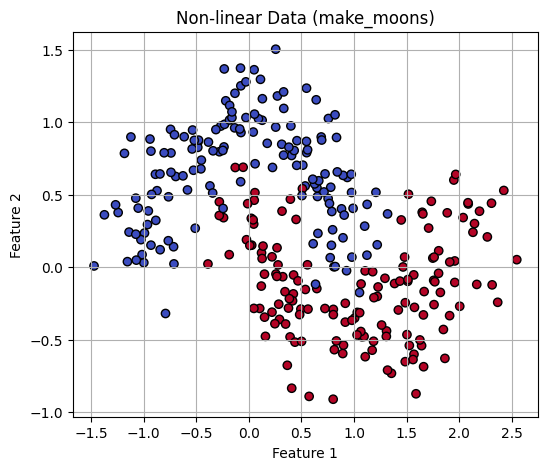

In [ ]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

# Generate non-linearly separable data
X, y = make_moons(n_samples=300, noise=0.2, random_state=42)

# Visualize the data
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.title("Non-linear Data (make_moons)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

In [ ]:
X.shape, y.shape

((300, 2), (300,))

### Train a logistic regression classifier without polynomial terms

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_std = sc.fit_transform(X)

In [ ]:
lr_moons = LogisticRegression()

In [ ]:
lr_moons.fit(X_std, y)

LogisticRegression()

```
plot_with_decision_boundary(X_std, y, None, lr_moons, "")
```

### Add polynomial terms with scikit-learn polynomial basis functions

- The polynomial projection is useful enough that it is built into Scikit-Learn, using the ``PolynomialFeatures`` transformer

```
# Example
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
x
```

```
# Example
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])
```

In [ ]:
X.shape

(300, 2)

```
# Transform the input for moons' data with polynomial of degree 3
moons_poly = PolynomialFeatures(3, include_bias=False)
X_std_poly = moons_poly.fit_transform(X_std)
X_std_poly.shape
```

### List the Polynomial Terms with Degree 3 (No Bias Term)

Assume a feature matrix $ X $ with two input features $ x_1 $ and $ x_2 $. Applying:

$$
\texttt{PolynomialFeatures(degree=3, include_bias=False).fit_transform(X)}
$$

generates all polynomials up to degree 3 (excluding the bias term), i.e., all combinations of $ x_1 $ and $ x_2 $ such that:

$$
x_1^a x_2^b \quad \text{where} \quad a + b \leq 3, \quad a, b \geq 0
$$

#### Resulting Terms

- Degree 1:
  $$
  x_1, \quad x_2
  $$

- Degree 2:
  $$
  x_1^2, \quad x_1 x_2, \quad x_2^2
  $$

- Degree 3:
  $$
  x_1^3, \quad x_1^2 x_2, \quad x_1 x_2^2, \quad x_2^3
  $$

```
lr_moons_poly = LogisticRegression()
lr_moons_poly.fit(X_std_poly, y)
```

```
plot_with_decision_boundary(X_std, y, moons_poly, lr_moons_poly, "")
```

# Retrieval Practice

## Overfitting Model

- The introduction of polynomial terms makes the model much more flexible, but it also can very quickly lead to over-fitting

- For example, if we choose the polynomial function with very high degree, the model may not look good.

In [ ]:
# Transform the input for moons' data with polynomial of degree 3
moons_poly_high = PolynomialFeatures(40, include_bias=False)
X_std_poly_high = moons_poly_high.fit_transform(X_std)
X_std_poly_high.shape

(300, 860)

In [ ]:
lr_moons_poly_high = LogisticRegression(max_iter=5000)
lr_moons_poly_high.fit(X_std_poly_high, y)

LogisticRegression(max_iter=5000)

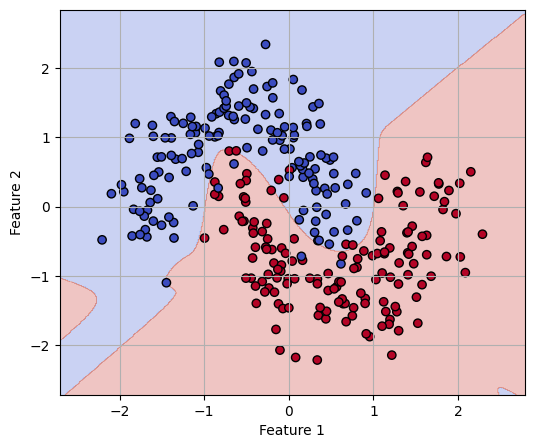

In [ ]:
plot_with_decision_boundary(X_std, y, moons_poly_high, lr_moons_poly_high, "")

### Overfitting and underfitting
- Overfitting is a common problem in machine learning, where a model performs well on training data but does not generalize well to unseen data (test data).
- If a model suffers from overfitting, we also say that the model has a **high variance**, which can be caused by having too many parameters, leading to a model that is too complex given the underlyingdata.
- Similarly, our model can also suffer
from underfitting (**high bias**), which means that our model is not complex enough to capture the pattern in the training data well and therefore also suffers from low performance on unseen data.
- To be robust, a model should maintain an appropriate balance between bias and variance.

<img src="https://i.imgur.com/ei07ag6.png" width=800>

## Regularization
- One way of finding a good bias-variance tradeoff is to tune the complexity of the model via regularization.
- Regularization is a very useful method for handling collinearity (high correlation among features), filtering out noise from data, and eventually preventing overfitting.
- The concept behind regularization is to introduce additional information (bias) to penalize extreme parameter (weight) values.


# Retrieval Practice

## Ridge (L2) Regulariztion
- The most common form of regularization is so-called $L2$ regularization (sometimes alsocalled $L2$ shrinkage or weight decay or Ridge regularization), which can be written as follows:
\begin{equation}
    \frac{\lambda}{2}\lvert\lvert \mathbf{w} \rvert\rvert^2=\frac{\lambda}{2}\Sigma_j w_j^2, j=1...m
\end{equation}
- $\lambda$ is called regularization parameter.
- For regularization to work properly, features should be normalized in the same scale.
- The loss function is: $J(\mathbf{w}) = .... + \frac{\lambda}{2}\Sigma_j w_j^2$, $j=1...m$.

### Weights of the classifier for Iris data vs. regularization

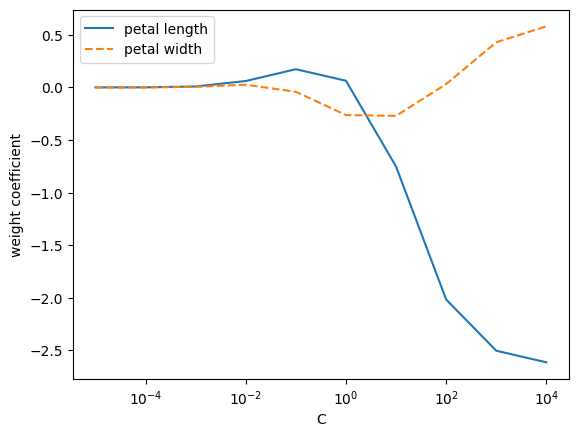

In [ ]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c, random_state=1, penalty="l2",
                            solver='lbfgs')
    lr.fit(X_iris_train_std, y_iris_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)

weights = np.array(weights)
plt.plot(params, weights[:, 0],
         label='petal length')
plt.plot(params, weights[:, 1], linestyle='--',
         label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
#plt.savefig('images/03_08.png', dpi=300)
plt.show()

### Apply regularization to the complex logistic regression model on moons data

```
# Transform the input for moons' data with polynomial of degree 3
moons_poly_high = PolynomialFeatures(40, include_bias=False)
X_std_poly_high = moons_poly_high.fit_transform(X_std)
X_std_poly_high.shape
```

```
lr_moons_poly_high_reg = LogisticRegression(C=0.00001, penalty="l2", max_iter=5000)
lr_moons_poly_high_reg.fit(X_std_poly_high, y)
```

```
plot_with_decision_boundary(X_std, y, moons_poly_high, lr_moons_poly_high_reg, "")
```

### Test different regularizations

In [ ]:
def plot_with_decision_boundary_ax(X, y, poly, model, title, ax):

    # Create meshgrid
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))


    # Transform meshgrid
    grid = np.c_[xx.ravel(), yy.ravel()]

    # Predict on meshgrid points
    if poly:
        grid_poly = poly.transform(grid)
        Z = clf.predict(grid_poly)
    else:
        Z = clf.predict(grid)

    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    ax.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

    # Plot the data points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')

    # Set the plot title and axis labels
    ax.set_title(title)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")

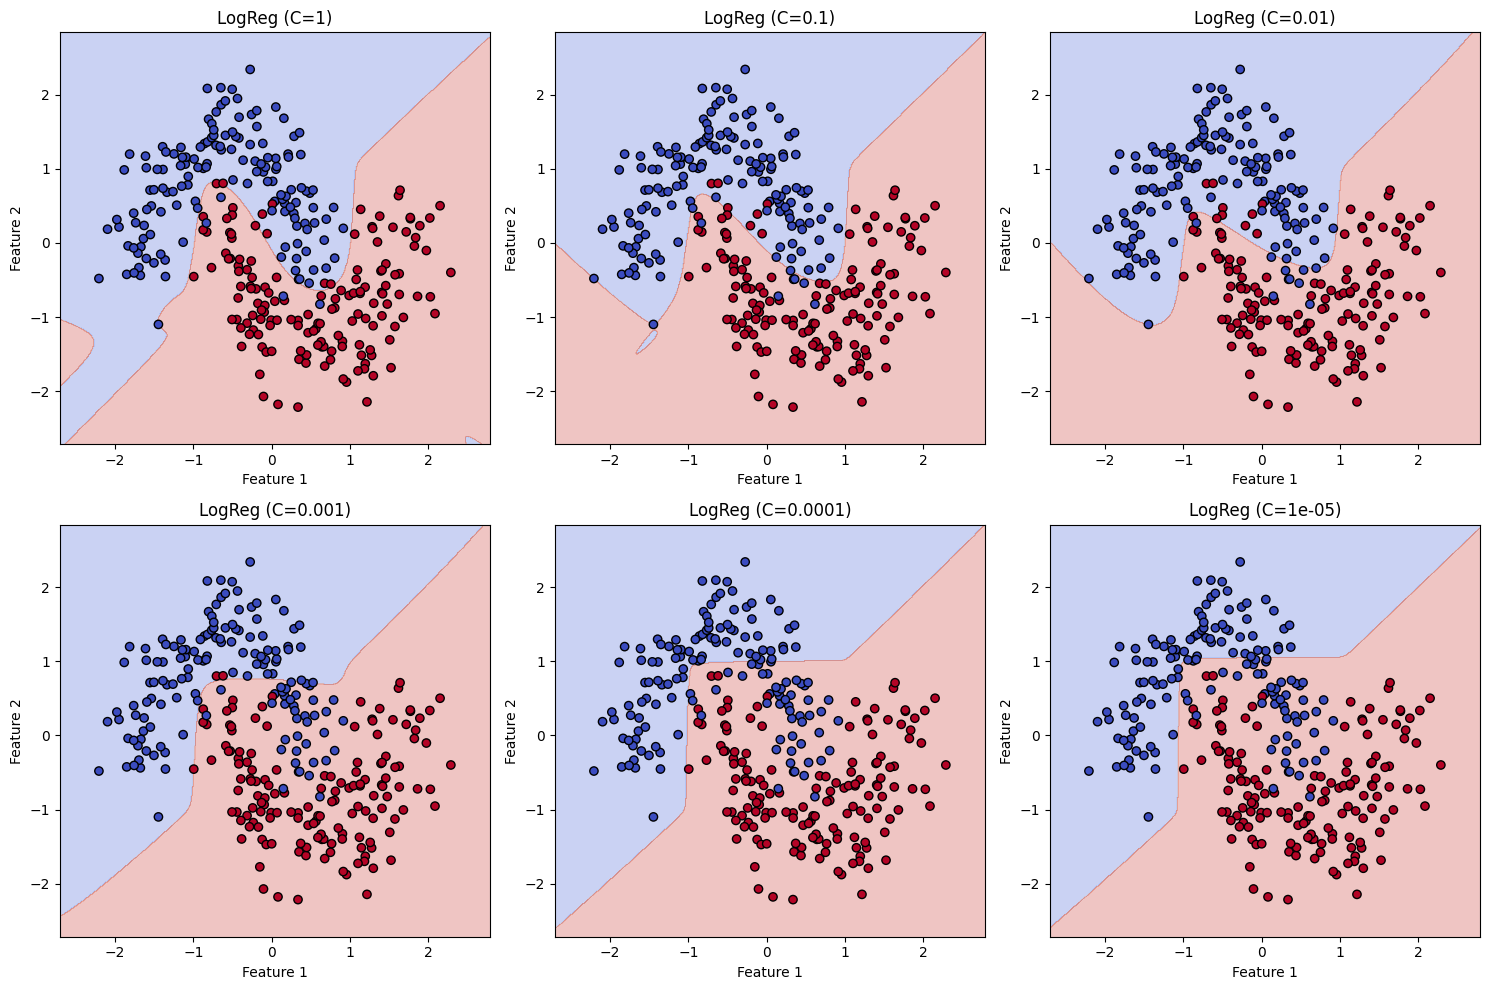

In [ ]:
C_values = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]
models = []
titles = []

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # Adjust figsize as needed
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

for i, C in enumerate(C_values):
    clf = LogisticRegression(C=C, solver='lbfgs', penalty="l2", max_iter=10000)
    clf.fit(X_std_poly_high, y)
    models.append(clf)
    titles.append(f"LogReg (C={C})")

    #plot_with_decision_boundary(X_std, y, moons_poly_high, clf, f"LogReg (C={C})")
    plot_with_decision_boundary_ax(X_std, y, moons_poly_high, clf, f"LogReg (C={C})", axes[i])

plt.tight_layout()  # Adjust subplot parameters for a tight layout.
plt.show()

### Update the weights of logistic regression with regularization
- Given input $\mathbf{x}=\{x_j^{(i)}\}$, $i=1...n, j=1...m$, and labels $\mathbf{y}=\{y^{(i)}\}$, where $y^{(i)}\in[0, 1]$, $i=1...n$.
- Initialize weights $\mathbf{w}=\{w_j\}$, $j=0...m$
- Compute $z^{(i)}=\mathbf{w}^{T}\mathbf{x}^{(i)}=w_0x_0^{(i)}+w_1x_1^{(i)}+...+w_mx_m^{(i)}$
- Compute $\bar{y}^{(i)}=\phi(z^{(i)})=\frac{1}{1+e^{-z^{(i)}}}$
- Calculate the loss: \begin{equation}
J(\mathbf{w}) = -\Sigma_i(y^{(i)} log(\bar{y}^{(i)})+(1-y^{(i)}) log(1-\bar{y}^{(i)}))+ \frac{\lambda}{2}\Sigma_j w_j^2, j=1...m
\end{equation}
- Update the weights by taking a step in the opposite direction of the gradient, $\nabla J(\mathbf{w})$ of our cost function $J(\mathbf{w})$:
 - $\mathbf{w} := \mathbf{w} + \Delta \mathbf{w}$, where $\Delta \mathbf{w}= - \eta \nabla J(\mathbf{w})$, specifically,
 \begin{equation}
\nabla J_j=\frac{\partial J}{\partial w_j} = - \Sigma_i(y^{(i)}-\phi(z^{(i)}))x_j^{(i)} + \lambda w_j
\end{equation}
 - Update $w_0$ without regularization:
\begin{equation}
\Delta w_0 = - \eta \frac{\partial J}{\partial w_0} = \eta \Sigma_i(y^{(i)}-\phi(z^{(i)}))x_0^{(i)}
\end{equation}
 - Update the rest of $w_j$ with regularization:
\begin{equation}
\Delta w_j = - \eta \frac{\partial J}{\partial w_j} = \eta (\Sigma_i(y^{(i)}-\phi(z^{(i)}))x_j^{(i)} - \lambda w_j)
\end{equation}

## Lasso regression ($L_1$ regularization)

- Another very common type of regularization is known as lasso, and involves penalizing the sum of absolute values (1-norms) of regression coefficients:

\begin{equation}
    \lambda\lvert\lvert \mathbf{w} \rvert\rvert=\lambda\Sigma_j w_j, j=1...m
\end{equation}


- Though this is conceptually very similar to ridge regression, the results can differ surprisingly: for example, due to geometric reasons lasso regression tends to favor *sparse models* where possible: that is, it preferentially sets model coefficients to exactly zero.

- We can see the behavior of L1 regularization in following figures:

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


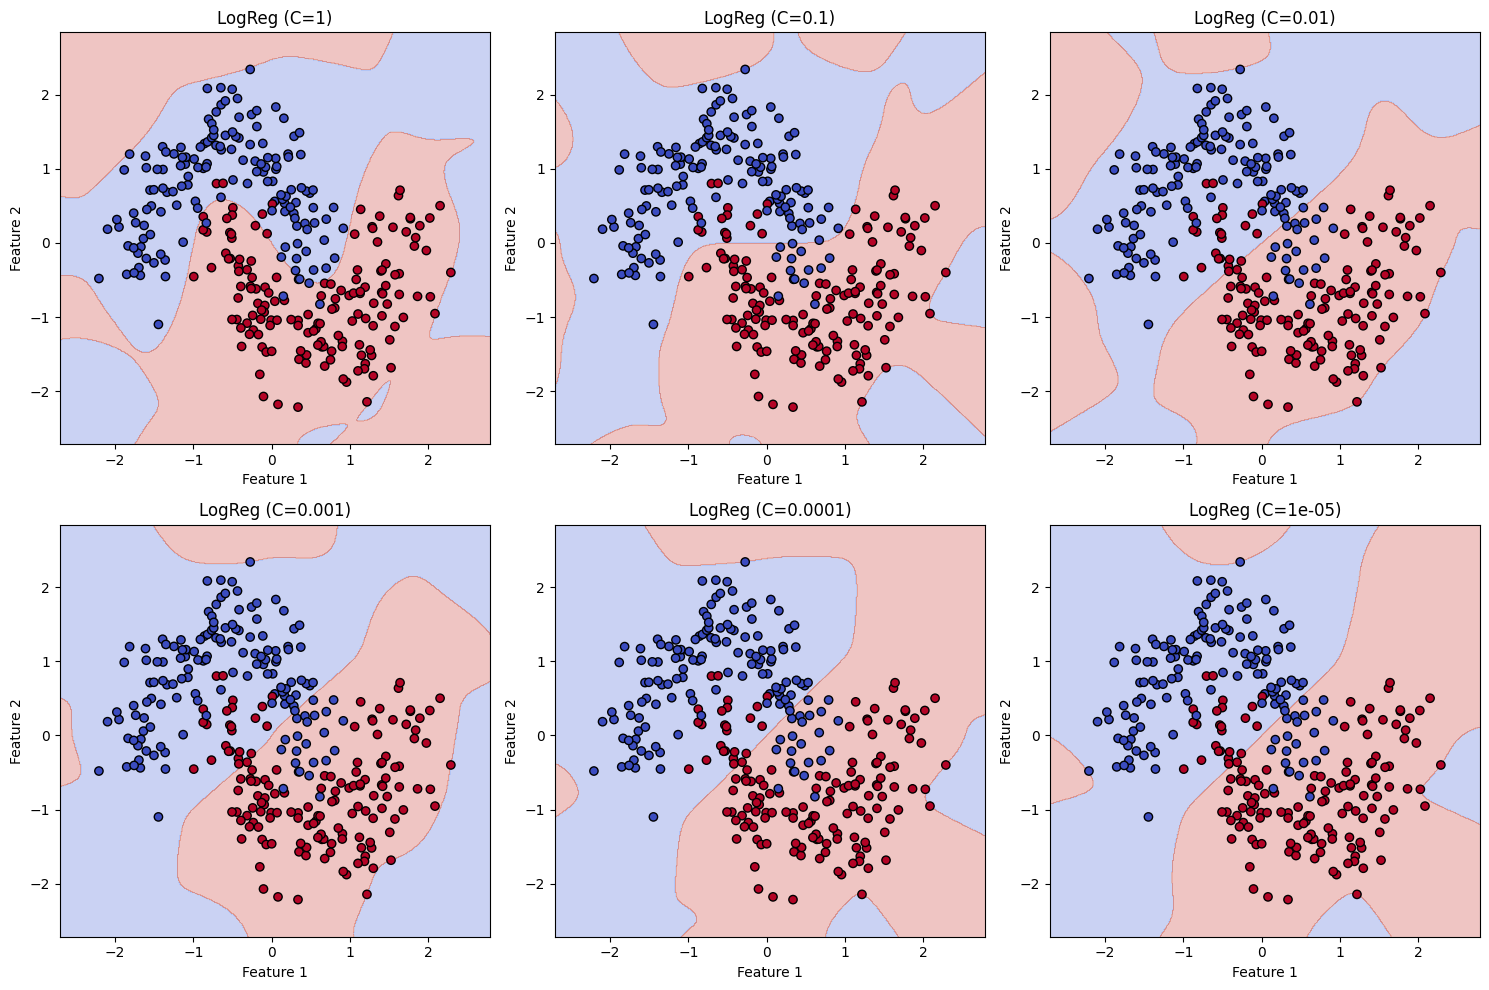

In [ ]:
C_values = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]
models = []
titles = []

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # Adjust figsize as needed
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

for i, C in enumerate(C_values):
    clf = LogisticRegression(C=C, solver='liblinear', penalty="l1", max_iter=1000)
    clf.fit(X_std_poly_high, y)
    models.append(clf)
    titles.append(f"LogReg (C={C})")

    #plot_with_decision_boundary(X_std, y, moons_poly_high, clf, f"LogReg (C={C})")
    plot_with_decision_boundary_ax(X_std, y, moons_poly_high, clf, f"LogReg (C={C})", axes[i])

plt.tight_layout()  # Adjust subplot parameters for a tight layout.
plt.show()

# Retrieval Practice